In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(rc={'figure.figsize':(15,5)}, font_scale = 1.3, context = 'notebook')

In [18]:
depth_data = np.load("dnn_losses_depth_sweep.npz")

depth2 = depth_data['depth2']
depth3 = depth_data['depth3']
depth4 = depth_data['depth4']
depth5 = depth_data['depth5']
depth2_test = depth_data['depth2_test']
depth3_test = depth_data['depth3_test']
depth4_test = depth_data['depth4_test']
depth5_test = depth_data['depth5_test']

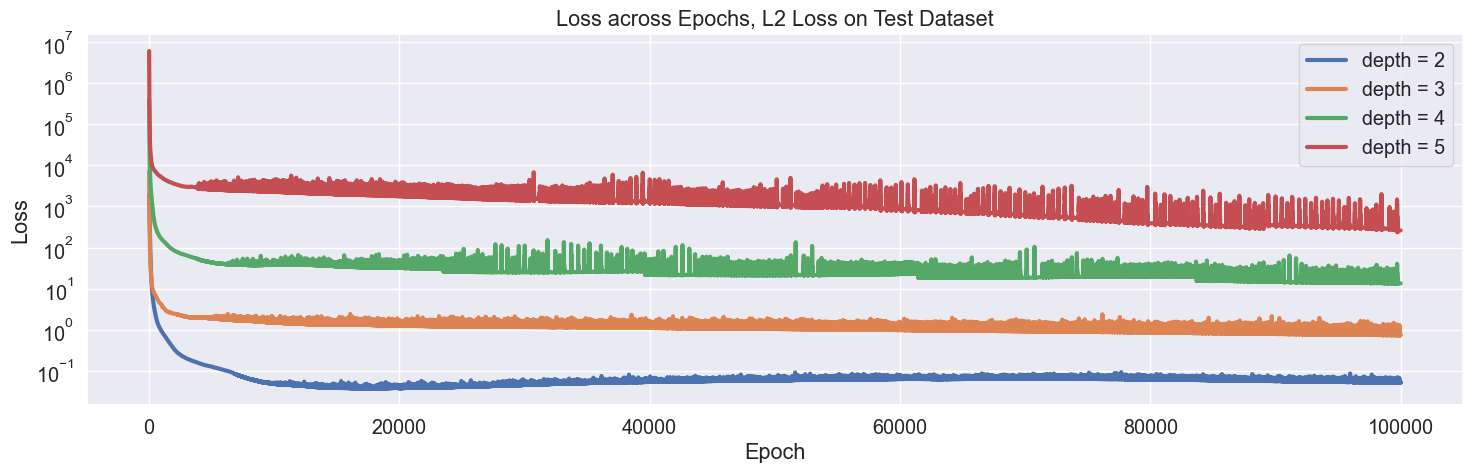

In [19]:
epochs = np.arange(1,depth2.shape[0]+1)
sns.lineplot(x = epochs, y = depth2_test, label = "depth = 2", linewidth = 3)
sns.lineplot(x = epochs, y = depth3_test, label = "depth = 3", linewidth = 3)
sns.lineplot(x = epochs, y = depth4_test, label = "depth = 4", linewidth = 3)
sns.lineplot(x = epochs, y = depth5_test, label = "depth = 5", linewidth = 3)


plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Loss across Epochs, L2 Loss on Test Dataset")
plt.legend()
plt.tight_layout()
plt.savefig("depth_experiment.png", dpi = 300)
plt.show()



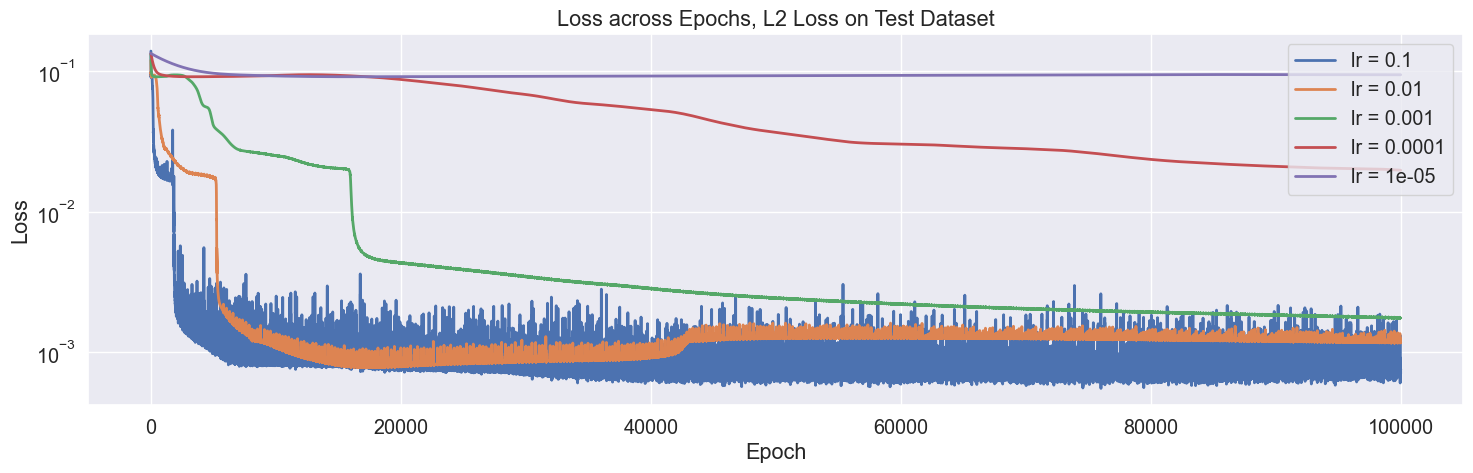

In [20]:
lr_data = np.load("dnn_losses_lr_sweep.npz")

for i in list(lr_data)[6:]:
        sns.lineplot(x = epochs, y = lr_data[i], label = "lr = " + i.split("_", 1)[0].removeprefix("depth"), linewidth = 2)


plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Loss across Epochs, L2 Loss on Test Dataset")
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("lr_experiment.png", dpi = 300)
plt.show()


/var/folders/vh/j0_lsnhd1_d199g2tx8chgx00000gp/T/ipykernel_68206/1564423814.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')


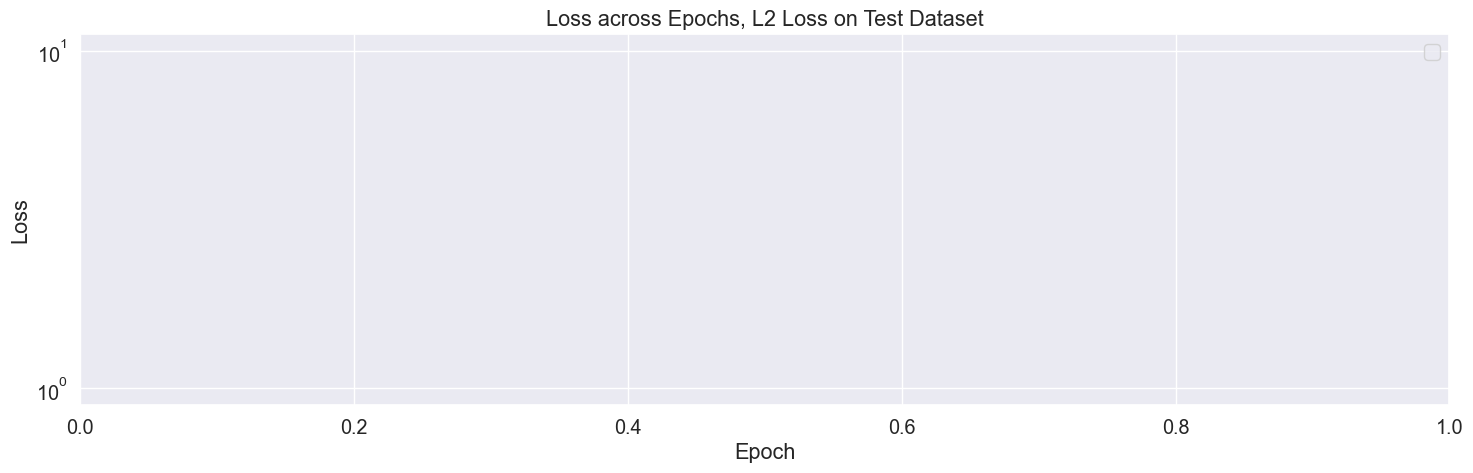

In [21]:
act_data = np.load("dnn_losses_act_sweep.npz")

for i in list(act_data)[7:]:
    sns.lineplot(x = epochs, y = act_data[i], label = i.split("_", 1)[0], linewidth = 2)



plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Loss across Epochs, L2 Loss on Test Dataset")
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("act_experiment.png", dpi = 300)
plt.show()


trial_0_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_10_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_11_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_12_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_13_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_14_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_15_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_16_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_17_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_18_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_19_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_1_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_2_losses.npz ['train', 'test', 'act', 'depth', 'lr', 'epochs_run']
trial_3_losses.npz ['train', 'test', 'act

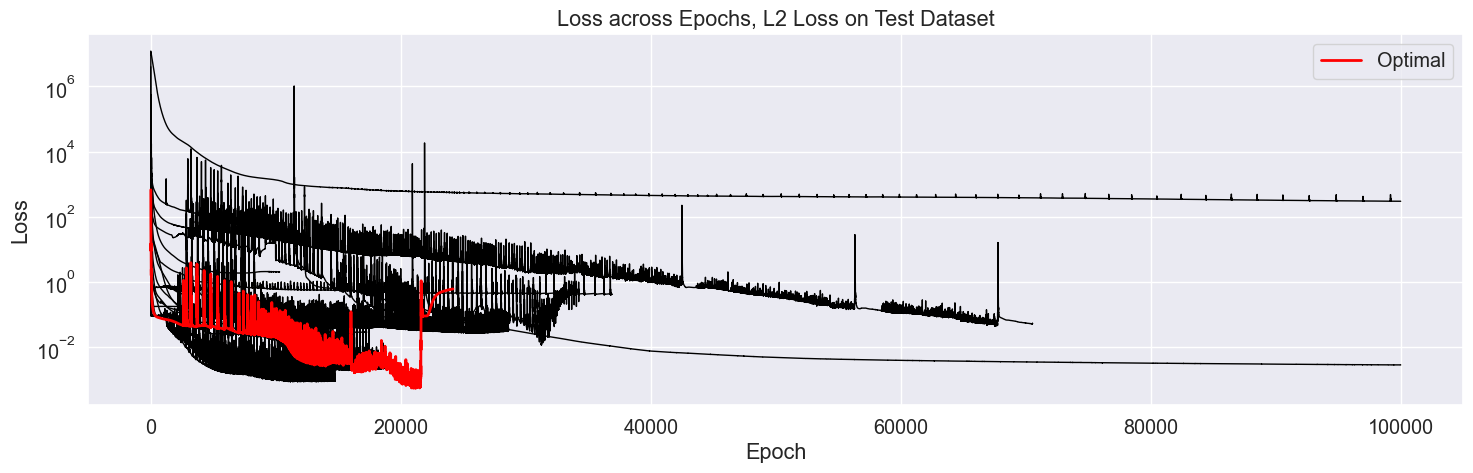

In [25]:
import glob

for i, fname in enumerate(sorted(glob.glob("trial_*_losses.npz"))):
    data = np.load(fname)
    print(fname, list(data.keys()))
    x_axis = np.arange(1, data['epochs_run'] +1)
    sns.lineplot(x = x_axis, y = data["test"], linewidth = 1, color = 'black')

opt = np.load("trial_9_losses.npz")
sns.lineplot(x =  np.arange(1, opt['epochs_run'] + 1), y = opt["test"], label = 'Optimal', color = 'red', linewidth = 2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Loss across Epochs, L2 Loss on Test Dataset")
plt.legend()
plt.tight_layout()
plt.savefig("hyperparam_experiment.png", dpi = 300)
plt.show()

/var/folders/vh/j0_lsnhd1_d199g2tx8chgx00000gp/T/ipykernel_68206/572688931.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


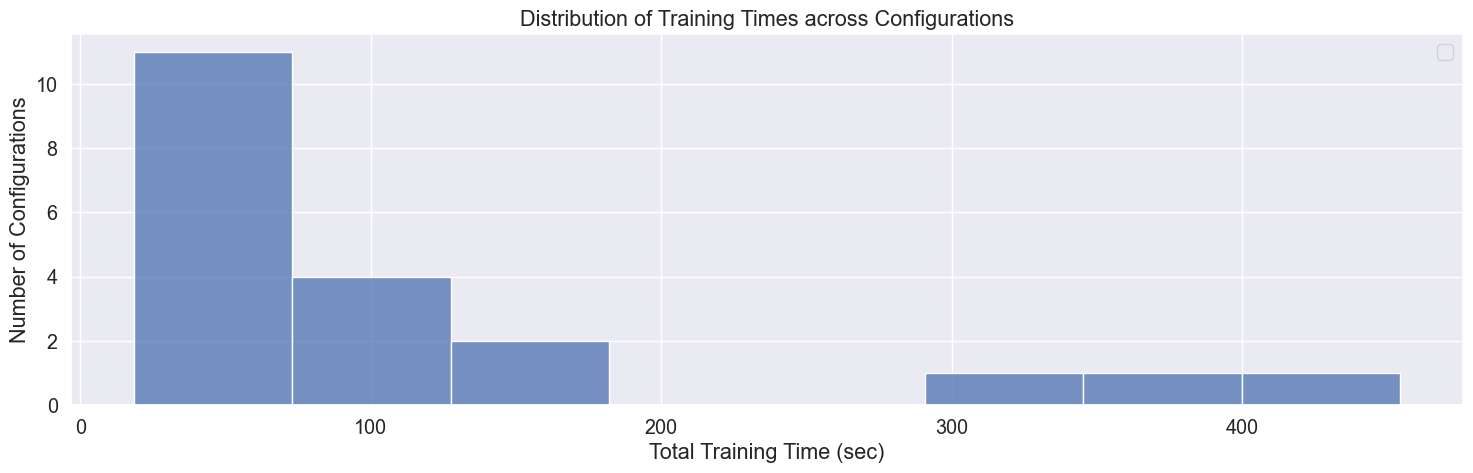

In [23]:
timing_data = np.load('timings.npz')

times = timing_data["trial_times"]
epochs = timing_data["trial_epochs"]
total_times = timing_data["total_time"]
times


sns.histplot(times)
plt.xlabel("Total Training Time (sec)")
plt.ylabel("Number of Configurations")
plt.title("Distribution of Training Times across Configurations")
plt.legend()
plt.tight_layout()
plt.savefig("hyperparam_experiment_times.png", dpi = 300)
plt.show()